In [1]:
import pandas as pd

import keras
from keras import layers
import keras.backend
from keras.layers import Input, Conv1D, MaxPool1D, Flatten, Dense, BatchNormalization, Dropout
from keras import models
import keras.utils

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import math
import time
import h5py
import sklearn
from sklearn.utils import shuffle

import os

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [2]:
# Set default options for paper
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'white'
         }
plt.rc('font', family='serif')
plt.rcParams.update(params)
plt.style.context('default')

### 1D CNN -> Vectors Only

In [3]:
# training data
data_train = np.load('data/jetConstTrain_overlap1.npz')
data_test = np.load('data/jetConstTest_overlap1.npz')
batch = len(data_train['pt1'][1])
feat_all = [key for key in data_train.keys()]
feat_all.remove('labels')
print(len(data_train['pt1']))

1000000


In [4]:
# OLD MODEL WITHOUT EXPERT VARIABLES ## 

def build_model(n):
    
    inpts = []
    xlayers = []
    for i in range(n):
        inpt = layers.Input(shape = (batch,1))
        
        x = layers.Conv1D(64, 3, padding = 'same', activation='relu')(inpt)
        x = layers.Conv1D(64, 1, padding = 'same', activation='relu')(x)
        x = layers.Dropout(0.2)(x)
        x = layers.MaxPool1D(2)(x)
        x = layers.Conv1D(32, 3, padding = 'same', activation='relu')(x)
        x = layers.Conv1D(32, 1, padding = 'same', activation='relu')(x)
        x = layers.Dropout(0.2)(x)
        x = layers.MaxPool1D(2)(x)
        x = layers.Flatten()(x)
        
        inpts.append(inpt)
        xlayers.append(x)
    
    if(n > 1):
        x = layers.concatenate(inputs=xlayers, axis=-1)

    x = layers.Dense(64, activation='relu', name = 'relu')(x)
    output = layers.Dense(2, activation='softmax', name = 'output')(x)
    model = models.Model(inputs=inpts, outputs=output)
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['categorical_crossentropy', 'accuracy'])
    
    return model

In [5]:
def build_XY(features,label,dic):
    X = [dic[key] for key in features]
    Y = [dic[key] for key in label]
    return X,Y
features = [feat_all[i] for i in range(6)]
X_train, Y_train = build_XY(features,['labels'],data_train)
X_test, Y_test = build_XY(features,['labels'],data_test)
# Y_test = [np.where(Y_test[0] == 0, Y_test[0]+1, Y_test[0]-1)]     #for flipping sig/bkg labels
# Y_train = [np.where(Y_train[0] == 0, Y_train[0]+1, Y_train[0]-1)]
# CNN = build_model(len(features))

In [6]:
# X_batch = [ele[:10] for ele in X_train]
# Y_batch = [ele[:10] for ele in Y_train]
# example_result = CNN.predict(x = X_batch)
# results = CNN.evaluate(x = X_batch, y = Y_batch )
# print(results)

In [7]:
# X_batch = [ele for ele in X_train]
# Y_batch = [ele for ele in Y_train]
# X_batch_test = [ele for ele in X_test]
# Y_batch_test = [ele for ele in Y_test]

In [8]:
# checkpoint_path = "model/CNN1D_DO.h5"
# model_checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', 
#                                    verbose=1, save_best_only=True, 
#                                    save_weights_only=False, mode='auto', 
#                                    period=1)    
# EPOCHS = 100
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta = 1.0e-6)
# history = CNN.fit(
#   X_batch, Y_batch,
#   epochs=EPOCHS, validation_split = 0.2, verbose = 0,
#   callbacks=[early_stop, model_checkpoint])

In [9]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     print(hist.keys())
#     hist['epoch'] = history.epoch
#     plt.figure()
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.plot(hist['epoch'], hist['loss'],
#            label='Train Error')
#     plt.plot(hist['epoch'], hist['val_loss'],
#            label = 'Val Error')
#     plt.legend()
#     plt.show()

# plot_history(history)
# plt.savefig('plots/history_CNN1D_DO')

In [10]:
# best_model = keras.models.load_model('model/CNN1D_DO.h5')
# best_model.summary()
# results = best_model.evaluate(X_batch_test, Y_batch_test, verbose = 0)
# print(results)

In [11]:
# # Plot ROC
# predict = best_model.predict(X_batch_test)
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(Y_batch_test[0][:][:,0], predict[:][:,0])
# roc_auc = auc(fpr, tpr)
# plt.plot(fpr, tpr, lw=4, color='b', label='auc = %.3f' % (roc_auc))
# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
# plt.xlim([0, 1.0])
# plt.ylim([0, 1.0])
# plt.xlabel('false positive rate')
# plt.ylabel('true positive rate')
# plt.title('Toy 1D CNN ROC')
# plt.legend(loc="lower right")
# plt.show()

In [12]:
# sig_pred = predict[np.argwhere(Y_batch_test[0][:,0]==1.).squeeze()].squeeze()
# bkg_pred = predict[np.argwhere(Y_batch_test[0][:,0]==0.).squeeze()].squeeze()
# plt.hist([sig_pred[:,0], bkg_pred[:,0]], 
#          color = ['blue', 'red'], histtype = 'step', label = ['signal predictions', 'background predictions'])
# plt.legend()
# plt.show()

# 1D CNN WITH XAUG INPUTS

In [13]:
def build_xaug(n, nex):
    
    inpts = []
    xaugs = []
    xlayers = []
    
    # loop over all input variables
    for i in range(n):
        
        # particle list inputs 
        if(i < n-nex):

            inpt = layers.Input(shape = (10,1))

            x = layers.Conv1D(64, 3, padding = 'same', activation='relu')(inpt)
            x = layers.Conv1D(64, 1, padding = 'same', activation='relu')(x)
            x = layers.Dropout(0.2)(x)
            x = layers.MaxPool1D(2)(x)
            x = layers.Conv1D(32, 3, padding = 'same', activation='relu')(x)
            x = layers.Conv1D(32, 1, padding = 'same', activation='relu')(x)
            x = layers.Dropout(0.2)(x)
            x = layers.MaxPool1D()(x)
            x1 = layers.Flatten()(x)

            inpts.append(inpt)
            xlayers.append(x1)
        
        elif((nex > 0)):
            inpt = layers.Input(shape = (1,))
            xaugs.append(inpt)
    
    #concatenation of particle list inputs with expert variable inputs
    if(n > 1):
        x = layers.concatenate(inputs=xlayers+xaugs, axis=-1)

    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    
    output = layers.Dense(2, activation='softmax', name = 'output')(x) 
    model = models.Model(inputs=inpts+xaugs, outputs=output)
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['categorical_crossentropy', 'accuracy'])
    
    return model

In [14]:
features = [key for key in data_train.keys()];features.remove('labels');features
X_train, Y_train = build_XY(features,['labels'],data_train)
X_test, Y_test = build_XY(features,['labels'],data_test)
# Y_test = [np.where(Y_test[0] == 0, Y_test[0]+1, Y_test[0]-1)]
# Y_train = [np.where(Y_train[0] == 0, Y_train[0]+1, Y_train[0]-1)]
CNN_XAUG = build_xaug(10, 4)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
X_batch = [ele[:10] for ele in X_train]
Y_batch = [ele[:10] for ele in Y_train]
example_result = CNN_XAUG.predict(x = X_batch)
results = CNN_XAUG.evaluate(x = X_batch, y = Y_batch )
print(results)

10/10 [==============================] - 0s 19ms/step
[0.7029539346694946, 0.7029539346694946, 0.5]


In [16]:
X_batch = [ele for ele in X_train]
Y_batch = [ele for ele in Y_train]
X_batch_test = [ele for ele in X_test]
Y_batch_test = [ele for ele in Y_test]

In [17]:
checkpoint_path = "model/CNN1D_XAUG_2.h5"
model_checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', 
                                   verbose=1, save_best_only=True, 
                                   save_weights_only=False, mode='auto', 
                                   period=1)    
EPOCHS = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta = 1.0e-6)
history = CNN_XAUG.fit(
  X_batch, Y_batch,
  epochs=EPOCHS, validation_split = 0.2, verbose = 0,
  callbacks=[early_stop, model_checkpoint])

Instructions for updating:
Use tf.cast instead.

Epoch 00001: val_loss improved from inf to 0.00672, saving model to model/CNN1D_XAUG_2.h5

Epoch 00002: val_loss improved from 0.00672 to 0.00627, saving model to model/CNN1D_XAUG_2.h5

Epoch 00003: val_loss improved from 0.00627 to 0.00622, saving model to model/CNN1D_XAUG_2.h5

Epoch 00004: val_loss improved from 0.00622 to 0.00617, saving model to model/CNN1D_XAUG_2.h5

Epoch 00005: val_loss did not improve from 0.00617

Epoch 00006: val_loss did not improve from 0.00617

Epoch 00007: val_loss improved from 0.00617 to 0.00614, saving model to model/CNN1D_XAUG_2.h5

Epoch 00008: val_loss did not improve from 0.00614

Epoch 00009: val_loss did not improve from 0.00614

Epoch 00010: val_loss did not improve from 0.00614

Epoch 00011: val_loss did not improve from 0.00614

Epoch 00012: val_loss did not improve from 0.00614

Epoch 00013: val_loss improved from 0.00614 to 0.00612, saving model to model/CNN1D_XAUG_2.h5

Epoch 00014: val_loss

Index(['val_loss', 'val_categorical_crossentropy', 'val_acc', 'loss',
       'categorical_crossentropy', 'acc'],
      dtype='object')


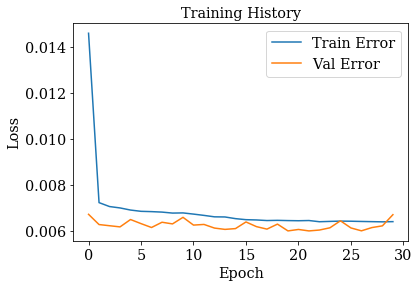

<Figure size 432x288 with 0 Axes>

In [18]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    print(hist.keys())
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
    plt.legend()
    plt.title("Training History")
    plt.show()

plot_history(history)
plt.savefig('plots/history_CNN1D_DO')

In [19]:
best_model = keras.models.load_model('model/CNN1D_XAUG_2.h5')
best_model.summary()
results = best_model.evaluate(X_batch_test, Y_batch_test[0], verbose = 0)
print(results)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10, 1)        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 10, 1)        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 10, 1)        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 10, 1)        0                                            
__________________________________________________________________________________________________
input_5 (I

[0.006095121731930762, 0.006095121731930762, 0.998177]


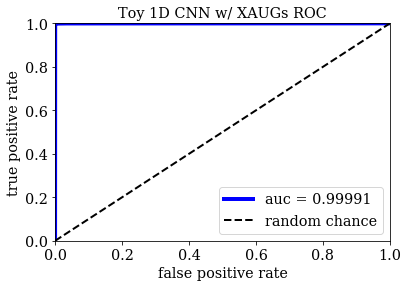

In [19]:
# Plot ROC
predict = best_model.predict(X_batch_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_batch_test[0], predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=4, color='b', label='auc = %.5f' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
plt.xlim([0, 1.0])
plt.ylim([0, 1.0])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Toy 1D CNN w/ XAUGs ROC')
plt.legend(loc="lower right")
plt.show()

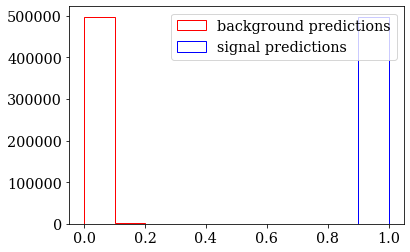

In [21]:
sig_pred = predict[np.argwhere(Y_batch_test[0][:,0]==1.).squeeze()].squeeze()
bkg_pred = predict[np.argwhere(Y_batch_test[0][:,0]==0.).squeeze()].squeeze()
plt.hist([sig_pred[:,0], bkg_pred[:,0]], 
         color = ['blue', 'red'], histtype = 'step', label = ['signal predictions', 'background predictions'])
plt.legend()
plt.show()

Index(['val_loss', 'val_categorical_crossentropy', 'val_acc', 'loss',
       'categorical_crossentropy', 'acc'],
      dtype='object')


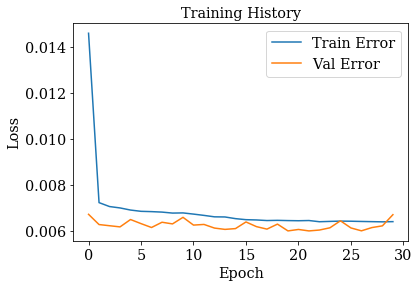

<Figure size 432x288 with 0 Axes>

In [22]:
plot_history(history)
plt.savefig('plots/history_CNN1D_XAUG')

In [ ]:
sig_pred = predict[np.argwhere(Y_batch_test[0].squeeze()==1.)].squeeze()
bkg_pred = predict[np.argwhere(Y_batch_test[0].squeeze()==0.)].squeeze()
plt.hist([sig_pred, bkg_pred],
         color = ['blue', 'red'], histtype = 'step', label = ['signal predictions', 'background predictions'])
plt.legend()
plt.show()